<a href="https://colab.research.google.com/github/arjunjanamatti/sam_kirk_project/blob/master/eur_to_usd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
#for deep learning model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
import seaborn as sns

In [5]:
eur_usd_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/^eurusd_daily_historical-data-09-30-2020.csv')
print('Shape of dataframe: ', eur_usd_df.shape)
eur_usd_df.head()

Shape of dataframe:  (5385, 7)


,Time,Open,High,Low,Last,Change,Volume
0,09/30/2020,1.17425,1.17547,1.16848,1.17309,-0.00115,167943.0
1,09/29/2020,1.16650,1.17450,1.16610,1.17424,0.00774,193717.0
2,09/28/2020,1.16213,1.16797,1.16151,1.16650,0.00354,187734.0
3,09/25/2020,1.16688,1.16847,1.16127,1.16296,-0.00394,211829.0
4,09/24/2020,1.16597,1.16867,1.16265,1.16690,0.00093,247053.0


In [10]:
eur_usd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5385 entries, 0 to 5384
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5385 non-null   object 
 1   Open    5384 non-null   float64
 2   High    5384 non-null   float64
 3   Low     5384 non-null   float64
 4   Last    5384 non-null   float64
 5   Change  5384 non-null   float64
 6   Volume  5384 non-null   float64
dtypes: float64(6), object(1)
memory usage: 294.6+ KB


In [3]:
df_with_volume_change = eur_usd_df.iloc[:,[-1,-3]]

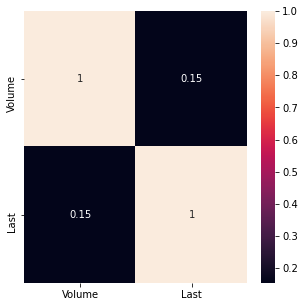

In [4]:
eur_usd_df_1 = eur_usd_df.drop(labels = ['Change'], axis = 1 )
plt.figure(figsize=(5,5))
sns.heatmap(df_with_volume_change.corr(), annot=True)
plt.show()

In [23]:
open_price = eur_usd_df.iloc[:-1,1:2]
train_set = open_price[:len(open_price)-15].values
test_set = open_price[len(open_price)-15:].values
print("Train size: ",train_set.shape)
print("Test size:",test_set.shape)

Train size:  (5369, 1)
Test size: (15, 1)


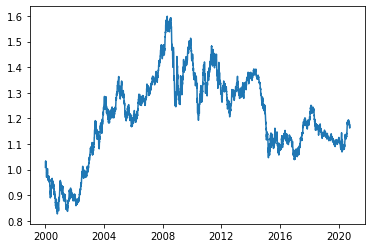

In [24]:
dates = pd.to_datetime(eur_usd_df.iloc[:-1,0])
plt.plot_date(dates, open_price,fmt='-')

In [25]:
x_train = []
y_train = []
sequence_length = 2
for i in range(len(train_set)):
    if (i + sequence_length) < len(train_set):
        x_train.append(train_set[i:i+sequence_length])
        y_train.append(train_set[i+sequence_length])

In [26]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(5367, 2, 1)

In [27]:
lstm_model = Sequential()

lstm_model.add(LSTM(units = 100,return_sequences=True,input_shape=(x_train.shape[1],1)))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units = 100,return_sequences=True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units = 100,return_sequences=True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units=100))
lstm_model.add(Dropout(0.2))

lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer = 'adam',loss='mean_squared_error')
lstm_model.fit(x_train,y_train, epochs=5, batch_size =1)

Epoch 1/5
5367/5367 [==============================] - 36s 7ms/step - loss: 0.0137
Epoch 2/5
5367/5367 [==============================] - 36s 7ms/step - loss: 0.0040
Epoch 3/5
5367/5367 [==============================] - 36s 7ms/step - loss: 0.0026
Epoch 4/5
5367/5367 [==============================] - 36s 7ms/step - loss: 0.0018
Epoch 5/5
5367/5367 [==============================] - 37s 7ms/step - loss: 0.0012


In [32]:
input = open_price[len(open_price)-len(test_set):].values
input.shape
input

array([[1.0173],
       [1.0122],
       [1.013 ],
       [1.0113],
       [1.0151],
       [1.0256],
       [1.0307],
       [1.0333],
       [1.0256],
       [1.0284],
       [1.0317],
       [1.032 ],
       [1.0304],
       [1.0255],
       [1.0085]])

In [34]:
x_test = []
for i in range(2,16):
    x_test.append(input[i-2:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
print(x_test.shape)
x_test

(14, 2, 1)


array([[[1.0173],
        [1.0122]],

       [[1.0122],
        [1.013 ]],

       [[1.013 ],
        [1.0113]],

       [[1.0113],
        [1.0151]],

       [[1.0151],
        [1.0256]],

       [[1.0256],
        [1.0307]],

       [[1.0307],
        [1.0333]],

       [[1.0333],
        [1.0256]],

       [[1.0256],
        [1.0284]],

       [[1.0284],
        [1.0317]],

       [[1.0317],
        [1.032 ]],

       [[1.032 ],
        [1.0304]],

       [[1.0304],
        [1.0255]],

       [[1.0255],
        [1.0085]]])

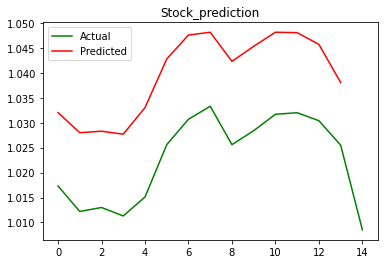

In [36]:
pred = lstm_model.predict(x_test)
# pred = pred[1:]
# # pred = sc.inverse_transform(pred)
plt.plot(test_set,color='green')
plt.plot(pred,color='red')
plt.title('Stock_prediction')
plt.legend(['Actual', 'Predicted'])
plt.show()

In [22]:
pred

array([[1.0242391],
       [1.0268409]], dtype=float32)